In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [11]:
test_labels[1]

2

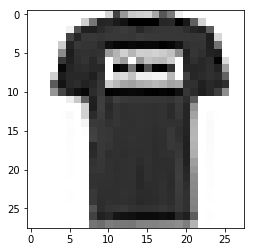

In [10]:
plt.imshow(train_images[1],cmap=plt.cm.binary)

In [12]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
len(test_labels)

10000

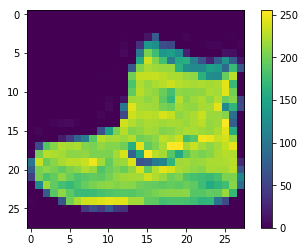

In [15]:

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
##to normalise
train_images=tf.keras.utils.normalize(train_images,axis=1)

In [17]:
test_images=tf.keras.utils.normalize(test_images,axis=1)

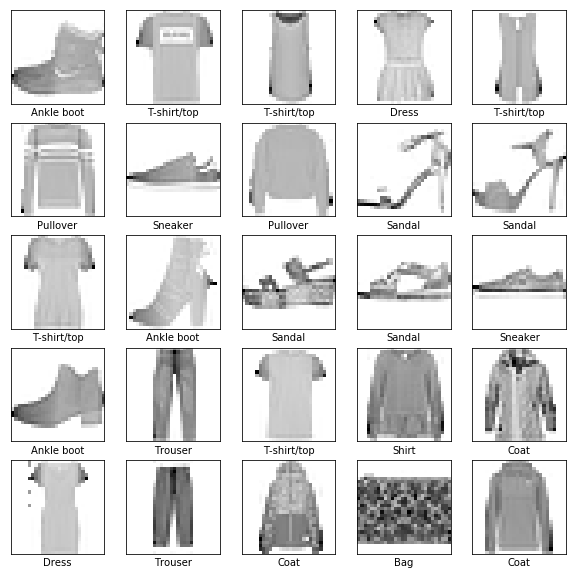

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())## input layer
model.add(tf.keras.layers.Dense(256,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(train_images,train_labels,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 8s 128us/step - loss: 0.4763 - acc: 0.8244
Epoch 2/3
60000/60000 [==============================] - 7s 116us/step - loss: 0.3489 - acc: 0.8704
Epoch 3/3
60000/60000 [==============================] - 7s 118us/step - loss: 0.3136 - acc: 0.8826


In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 48us/step
Test accuracy: 0.869


In [23]:
predictions = model.predict(test_images)

In [27]:
predictions[0]

array([1.0500233e-05, 2.2985523e-07, 1.4494681e-06, 8.3499235e-06,
       2.0560437e-07, 4.3341768e-04, 6.8009649e-06, 1.8947678e-02,
       1.6272961e-05, 9.8057508e-01], dtype=float32)

In [28]:
np.argmax(predictions[0])

9

In [29]:
test_labels[0]

9

In [30]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

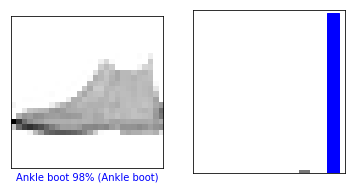

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

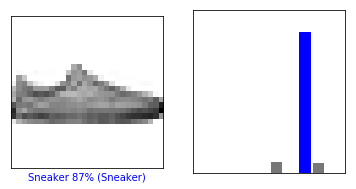

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

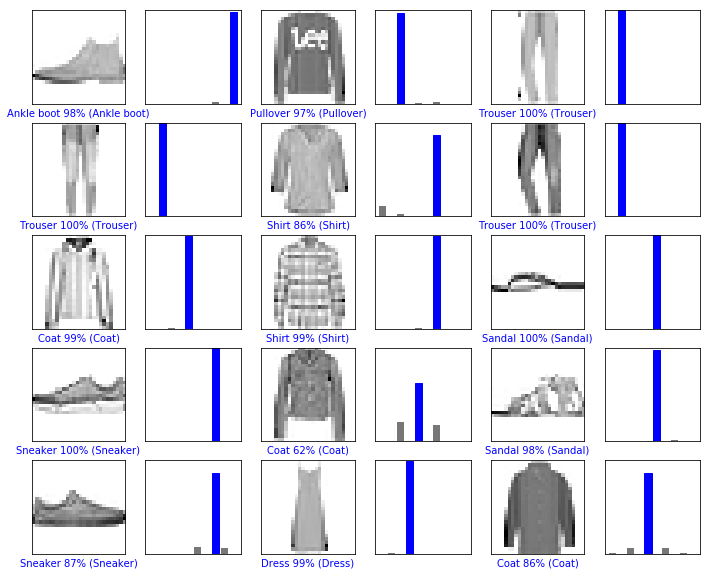

In [33]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [34]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [35]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [36]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.0500223e-05 2.2985523e-07 1.4494681e-06 8.3499235e-06 2.0560455e-07
  4.3341707e-04 6.8009649e-06 1.8947668e-02 1.6272992e-05 9.8057508e-01]]


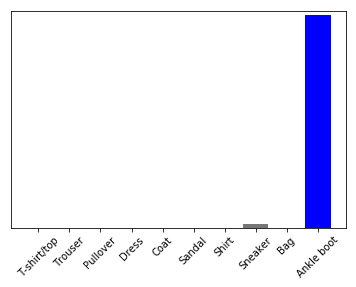

In [37]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [38]:

np.argmax(predictions_single[0])

9